In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/"labels"/f"{o.stem}_P{o.suffix}",
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 129MB/s]


epoch,train_loss,valid_loss,time
0,3.120060,3.613695,01:14


epoch,train_loss,valid_loss,time
0,2.123436,1.856891,01:17
1,1.775002,1.255997,01:15
2,1.556630,1.296960,01:18
3,1.417615,1.112850,01:16
4,1.281005,1.053144,01:15
5,1.166618,0.906223,01:15
6,1.067371,0.907127,01:15
7,0.986475,0.868545,01:15


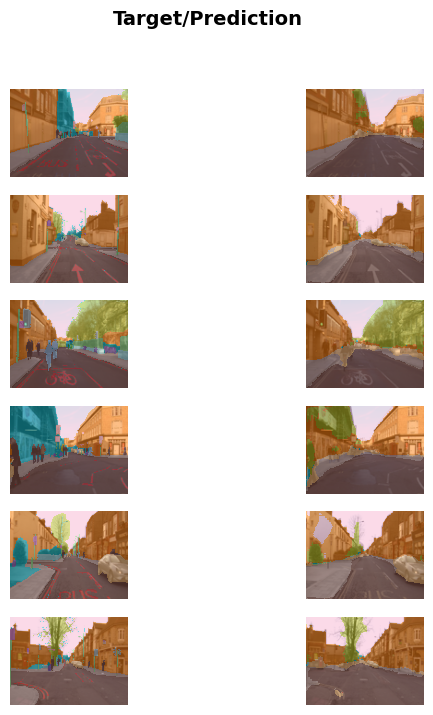

In [3]:
learn.show_results(max_n=6, figsize=(7, 8))